In [ ]:
from google.colab import drive
import csv

rds_host = ""
rds_port = ""
rds_username = ""
rds_password = ""
rds_database = ""

drive.mount('/content/drive')

with open('/content/drive/MyDrive/UofT/Data-Analytics-Boot-Camp/Project04-Team01/Keys/rds_Keys.csv') as file:
  csvreader = csv.reader(file)
  for row in csvreader:
    rds_host = row[0]
    rds_port = row[1]
    rds_username = row[2]
    rds_password = row[3]
    rds_database = row[4]

drive.flush_and_unmount()

Mounted at /content/drive


In [ ]:
import pandas as pd
from sqlalchemy import create_engine
from sqlalchemy import text

engine = create_engine(f'postgresql://{rds_username}:{rds_password}@{rds_host}:{rds_port}/{rds_database}')

with engine.begin() as connection:
  data = pd.read_sql(text('SELECT * FROM heart_disease'), con=connection)
  connection.close()
  # statement = connection.execute(text('SELECT * FROM heart_disease'))
  # resultSet = statement.fetchall()
  # data = pd.DataFrame(resultSet, columns=["age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach", "exang", "oldpeak", "slope", "ca", "thal", "target"])

engine.dispose()
del engine

In [ ]:
data.dtypes

age         float64
sex         float64
cp          float64
trestbps    float64
chol        float64
fbs         float64
restecg     float64
thalach     float64
exang       float64
oldpeak     float64
slope       float64
ca          float64
thal        float64
target        int64
dtype: object

In [ ]:
data.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [ ]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,3.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,1.602694,0.676768,4.730640,0.461279
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,1.938629,0.499340
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,1.000000


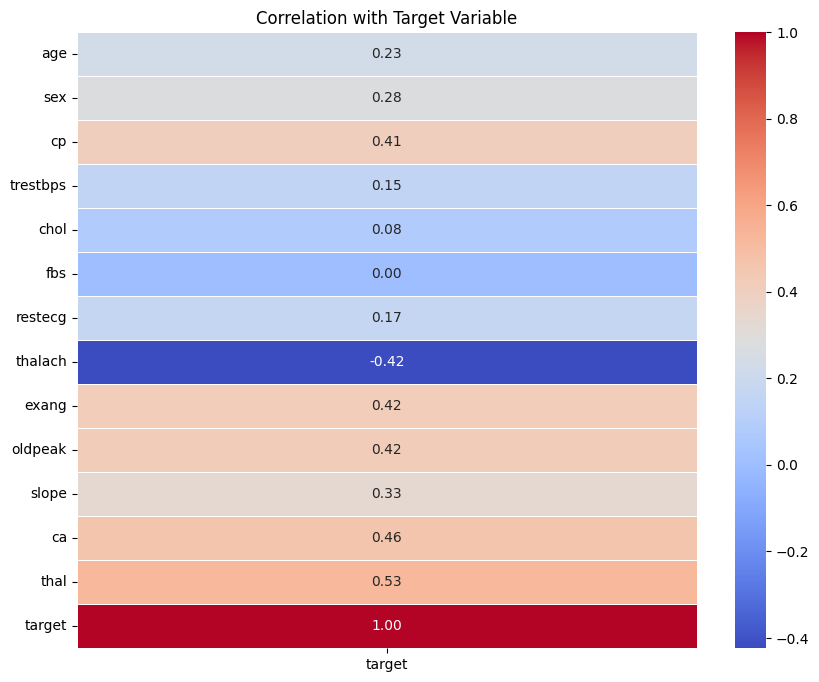

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your dataset is stored in a DataFrame called 'data'
correlation_matrix = data.corr()

# Select correlations of features with the target variable
target_correlations = correlation_matrix['target']

# Optional: Customize the correlation matrix visualization
plt.figure(figsize=(10, 8))
sns.heatmap(target_correlations.to_frame(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation with Target Variable")
plt.show()

In [ ]:
correlation_matrix["target"]

age         0.227075
sex         0.278467
cp          0.408945
trestbps    0.153490
chol        0.080285
fbs         0.003167
restecg     0.166343
thalach    -0.423817
exang       0.421355
oldpeak     0.424052
slope       0.333049
ca          0.463189
thal        0.526640
target      1.000000
Name: target, dtype: float64

In [ ]:
target_columns = ["target"]
feature_columns = data.columns.difference(target_columns)
categorical_columns = ["sex", "cp", "fbs", "restecg", "exang", "slope", "ca", "thal"]
numerical_columns = data.columns.difference(categorical_columns + target_columns)

In [ ]:
print(data.loc[data["target"] == 0, numerical_columns].mean())
print()
print(data.loc[data["target"] == 1, numerical_columns].mean())

print()
print()

print(data.loc[data["target"] == 0, "target"].count())
print()
print(data.loc[data["target"] == 1, "target"].count())

age          52.64375
chol        243.49375
oldpeak       0.59875
thalach     158.58125
trestbps    129.17500
dtype: float64

age          56.759124
chol        251.854015
oldpeak       1.589051
thalach     139.109489
trestbps    134.635036
dtype: float64


160

137


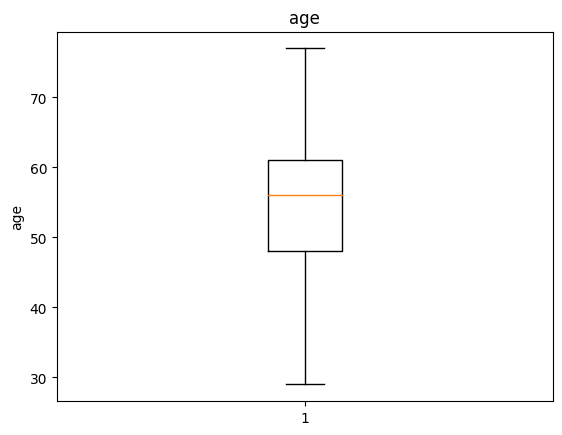

The lower quartile of temperatures is: 48.0
The upper quartile of temperatures is: 61.0
The interquartile range of temperatures is: 13.0
The the median of temperatures is: 56.0 
Values below 28.5 could be outliers.
Values above 80.5 could be outliers.
Pearson Correlation: PearsonRResult(statistic=0.22707515465323652, pvalue=7.862867945608163e-05)


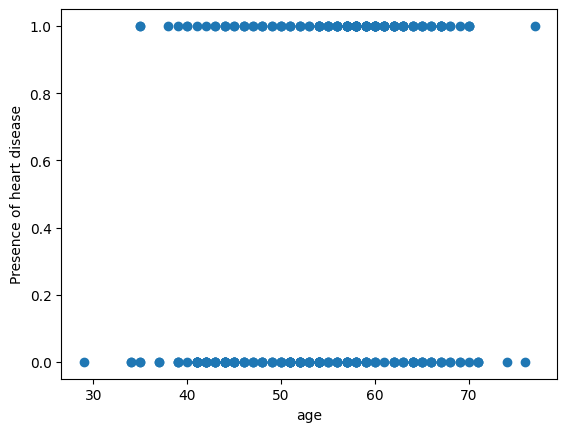

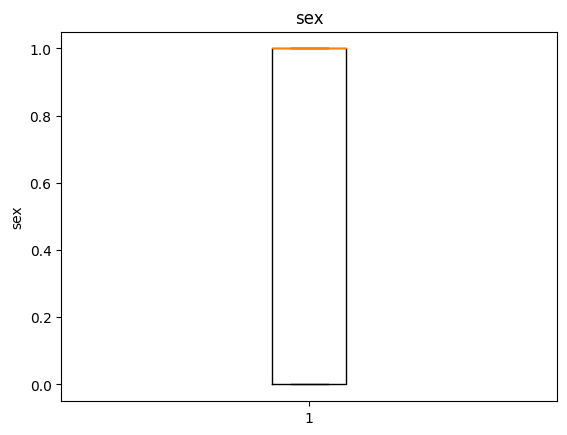

The lower quartile of temperatures is: 0.0
The upper quartile of temperatures is: 1.0
The interquartile range of temperatures is: 1.0
The the median of temperatures is: 1.0 
Values below -1.5 could be outliers.
Values above 2.5 could be outliers.
Pearson Correlation: PearsonRResult(statistic=0.27846669665379614, pvalue=1.085075745016708e-06)


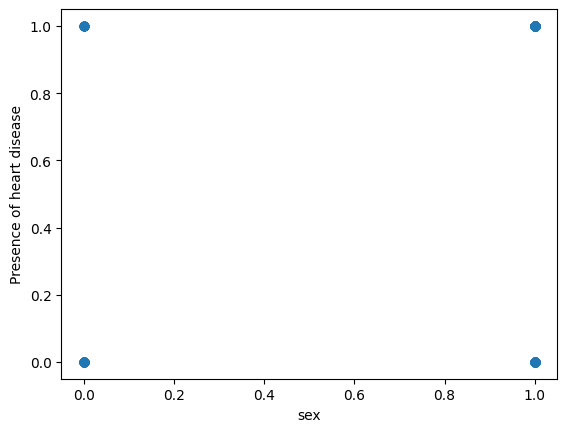

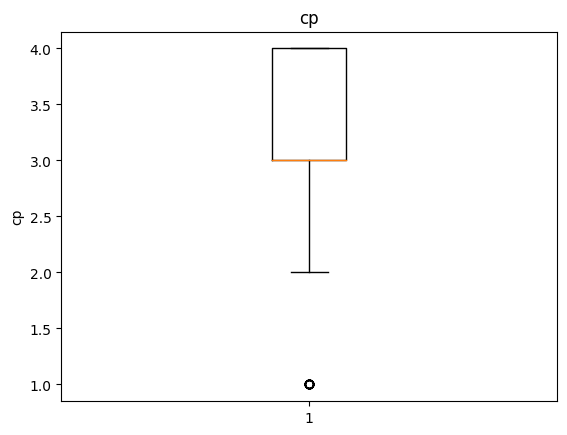

The lower quartile of temperatures is: 3.0
The upper quartile of temperatures is: 4.0
The interquartile range of temperatures is: 1.0
The the median of temperatures is: 3.0 
Values below 1.5 could be outliers.
Values above 5.5 could be outliers.
Pearson Correlation: PearsonRResult(statistic=0.4089446866752394, pvalue=2.1134928777040018e-13)


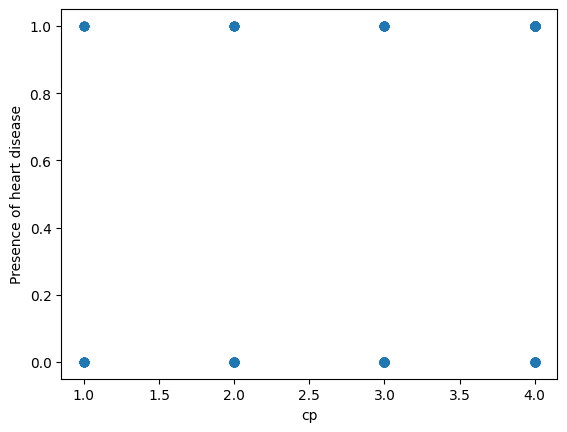

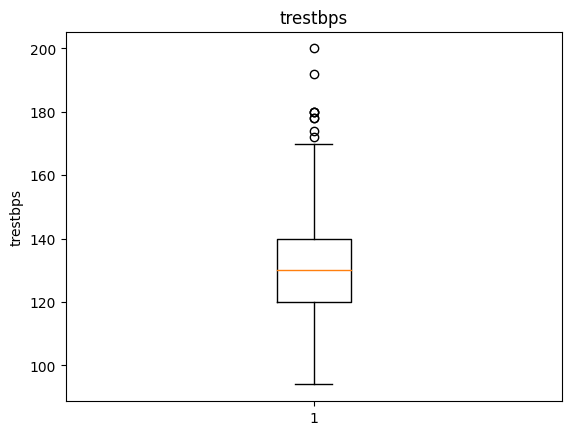

The lower quartile of temperatures is: 120.0
The upper quartile of temperatures is: 140.0
The interquartile range of temperatures is: 20.0
The the median of temperatures is: 130.0 
Values below 90.0 could be outliers.
Values above 170.0 could be outliers.
Pearson Correlation: PearsonRResult(statistic=0.15349002570252018, pvalue=0.008054796358874896)


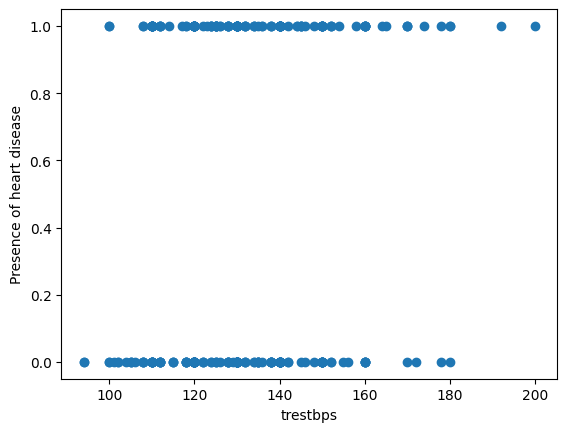

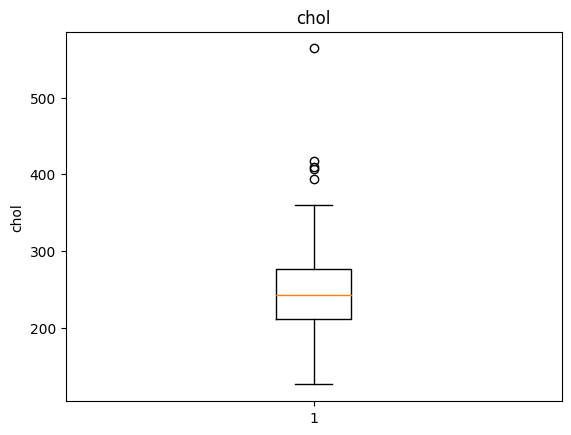

The lower quartile of temperatures is: 211.0
The upper quartile of temperatures is: 276.0
The interquartile range of temperatures is: 65.0
The the median of temperatures is: 243.0 
Values below 113.5 could be outliers.
Values above 373.5 could be outliers.
Pearson Correlation: PearsonRResult(statistic=0.08028475098000229, pvalue=0.16758776714742332)


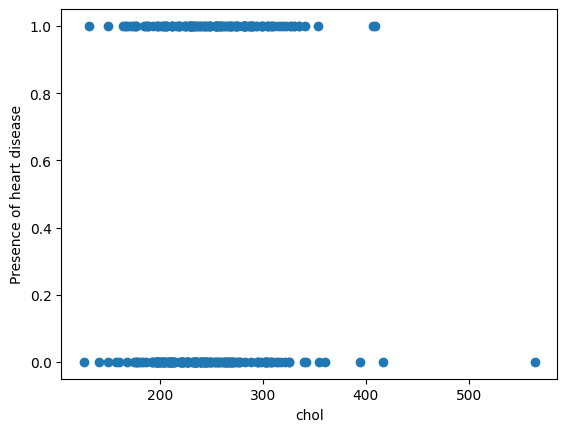

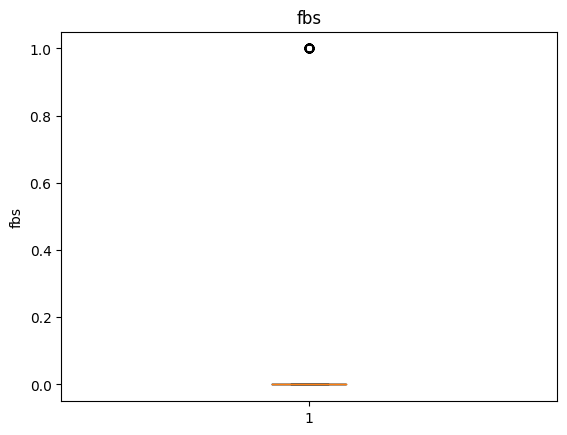

The lower quartile of temperatures is: 0.0
The upper quartile of temperatures is: 0.0
The interquartile range of temperatures is: 0.0
The the median of temperatures is: 0.0 
Values below 0.0 could be outliers.
Values above 0.0 could be outliers.
Pearson Correlation: PearsonRResult(statistic=0.0031668297708802844, pvalue=0.9566593827120229)


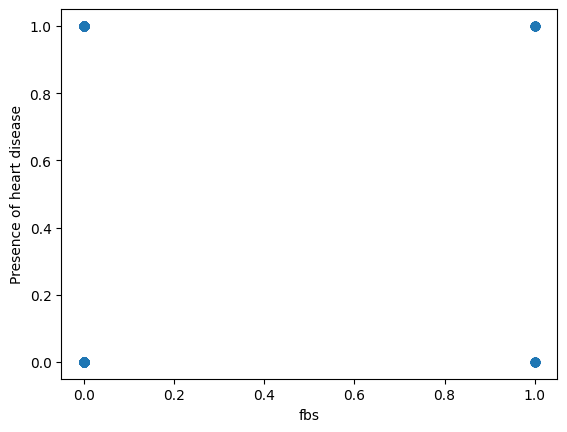

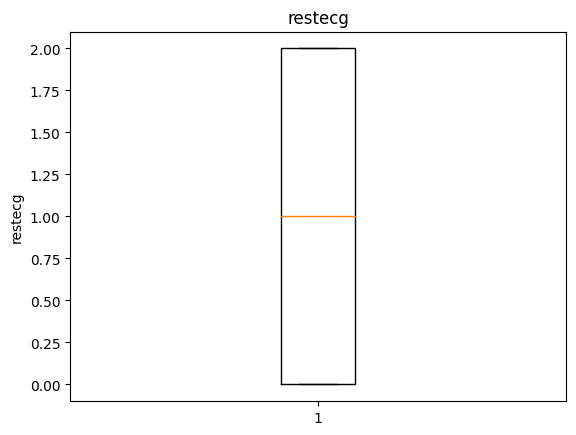

The lower quartile of temperatures is: 0.0
The upper quartile of temperatures is: 2.0
The interquartile range of temperatures is: 2.0
The the median of temperatures is: 1.0 
Values below -3.0 could be outliers.
Values above 5.0 could be outliers.
Pearson Correlation: PearsonRResult(statistic=0.16634348816602412, pvalue=0.004044406128535514)


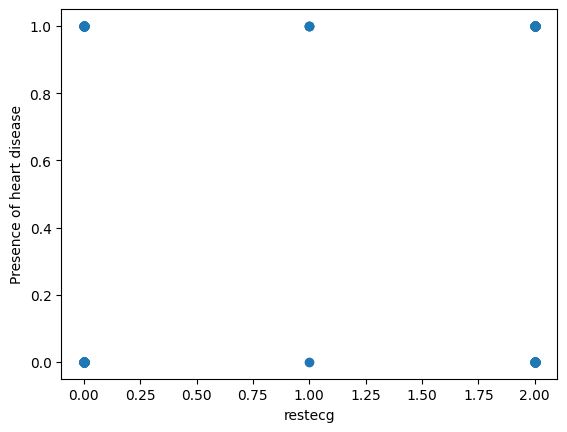

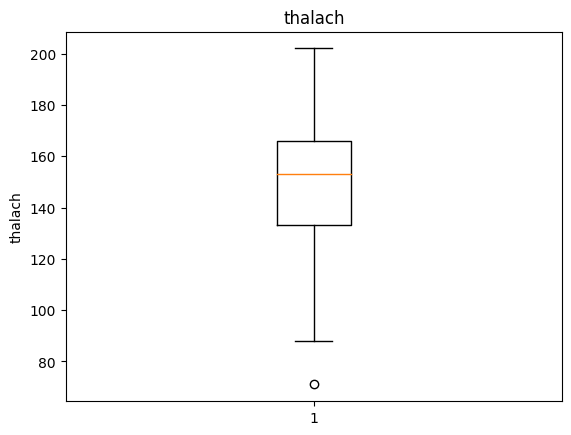

The lower quartile of temperatures is: 133.0
The upper quartile of temperatures is: 166.0
The interquartile range of temperatures is: 33.0
The the median of temperatures is: 153.0 
Values below 83.5 could be outliers.
Values above 215.5 could be outliers.
Pearson Correlation: PearsonRResult(statistic=-0.4238170641833711, pvalue=2.2397153233937345e-14)


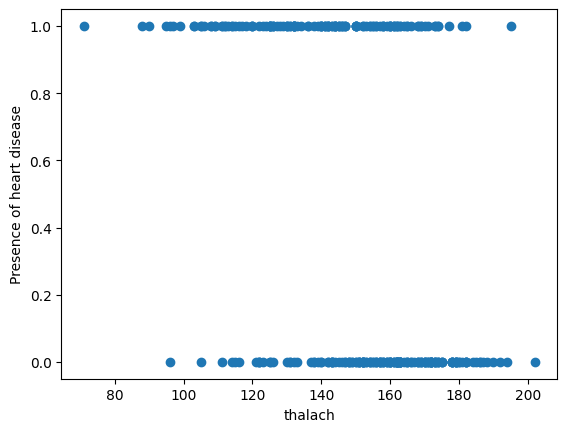

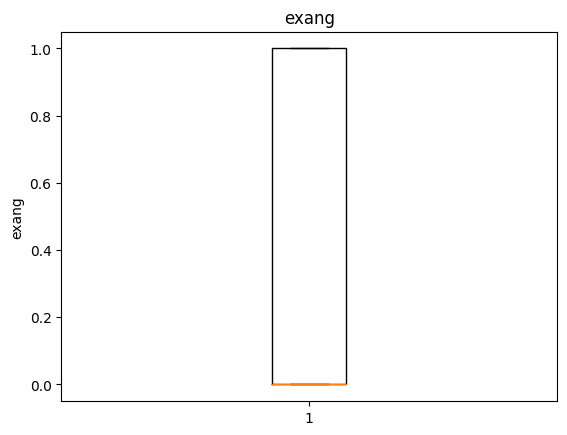

The lower quartile of temperatures is: 0.0
The upper quartile of temperatures is: 1.0
The interquartile range of temperatures is: 1.0
The the median of temperatures is: 0.0 
Values below -1.5 could be outliers.
Values above 2.5 could be outliers.
Pearson Correlation: PearsonRResult(statistic=0.4213554904564531, pvalue=3.272489572993999e-14)


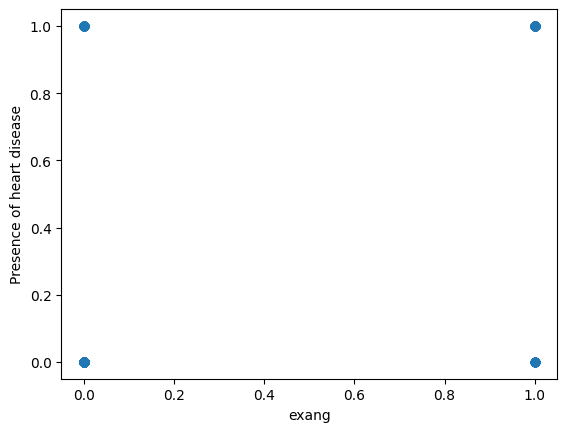

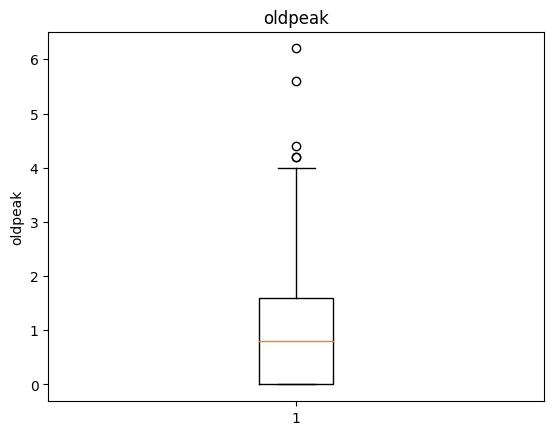

The lower quartile of temperatures is: 0.0
The upper quartile of temperatures is: 1.6
The interquartile range of temperatures is: 1.6
The the median of temperatures is: 0.8 
Values below -2.4000000000000004 could be outliers.
Values above 4.0 could be outliers.
Pearson Correlation: PearsonRResult(statistic=0.42405205671599877, pvalue=2.1597372771143582e-14)


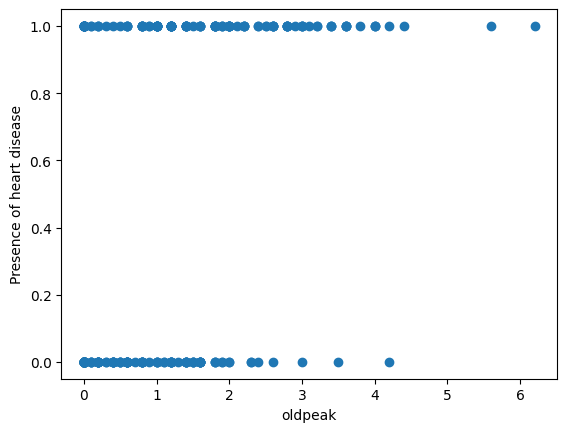

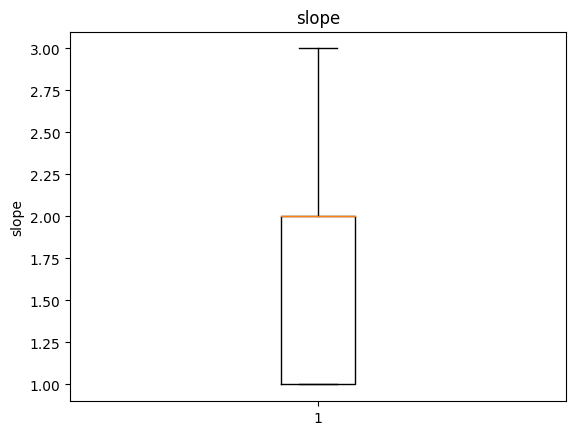

The lower quartile of temperatures is: 1.0
The upper quartile of temperatures is: 2.0
The interquartile range of temperatures is: 1.0
The the median of temperatures is: 2.0 
Values below -0.5 could be outliers.
Values above 3.5 could be outliers.
Pearson Correlation: PearsonRResult(statistic=0.33304910873955584, pvalue=3.997424752099505e-09)


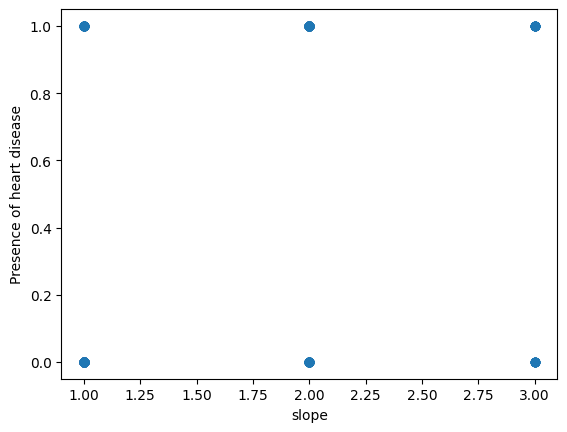

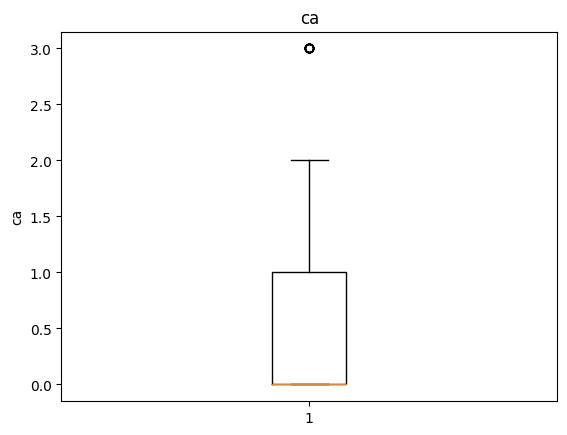

The lower quartile of temperatures is: 0.0
The upper quartile of temperatures is: 1.0
The interquartile range of temperatures is: 1.0
The the median of temperatures is: 0.0 
Values below -1.5 could be outliers.
Values above 2.5 could be outliers.
Pearson Correlation: PearsonRResult(statistic=0.4631886250630225, pvalue=3.3589468512701036e-17)


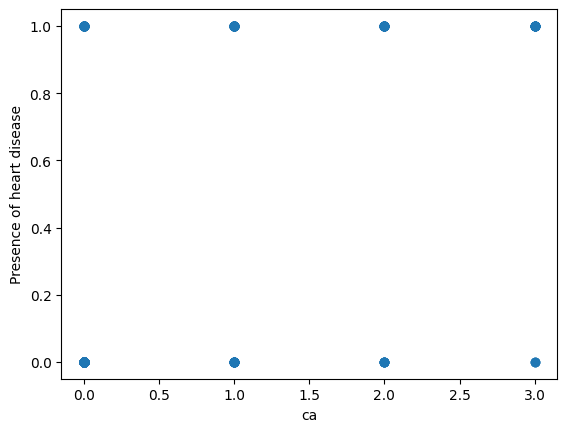

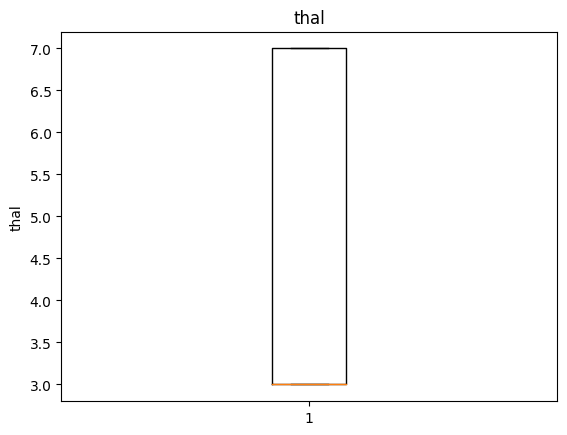

The lower quartile of temperatures is: 3.0
The upper quartile of temperatures is: 7.0
The interquartile range of temperatures is: 4.0
The the median of temperatures is: 3.0 
Values below -3.0 could be outliers.
Values above 13.0 could be outliers.
Pearson Correlation: PearsonRResult(statistic=0.5266395760779842, pvalue=1.3594560319516363e-22)


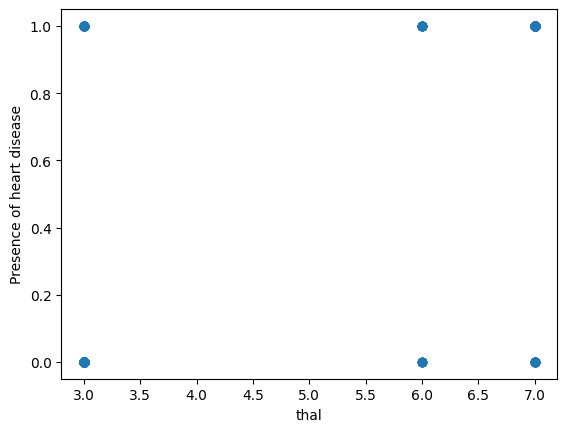

In [ ]:
import scipy.stats as st

for col in data.columns.values:
  if col == "target":
    break

  fig1, ax1 = plt.subplots()
  ax1.set_title(col)
  ax1.set_ylabel(col)
  ax1.boxplot(data[col])
  plt.show()

  quartiles = data[col].quantile([.25,.5,.75])
  lowerq = quartiles[0.25]
  upperq = quartiles[0.75]
  iqr = upperq-lowerq

  print(f"The lower quartile of temperatures is: {lowerq}")
  print(f"The upper quartile of temperatures is: {upperq}")
  print(f"The interquartile range of temperatures is: {iqr}")
  print(f"The the median of temperatures is: {quartiles[0.5]} ")

  lower_bound = lowerq - (1.5*iqr)
  upper_bound = upperq + (1.5*iqr)
  print(f"Values below {lower_bound} could be outliers.")
  print(f"Values above {upper_bound} could be outliers.")

  correlation = st.pearsonr(data[col], data["target"])
  print(f"Pearson Correlation: {correlation}")

  plt.scatter(data[col], data["target"])
  plt.xlabel(col)
  plt.ylabel('Presence of heart disease')
  plt.show()


